In [1]:
from image_ops import Dataset_Operations
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from clustering import k_means
data = np.load("big_baseline.npy")[:4000]

  0%|          | 0/40 [00:00<?, ?it/s]

[2098, 1914, 686, 2410, 1869, 3485, 1291, 3189, 3420, 2657, 1171, 1111, 3365, 3314, 316, 420, 1919, 3631, 2941, 2061, 3612, 2042, 576, 2823, 837, 1950, 762, 1273, 561, 848, 1097, 3510, 2776, 2045, 2573, 2295, 3454, 2967, 2488, 2210]


100%|██████████| 40/40 [40:31<00:00, 61.75s/it]


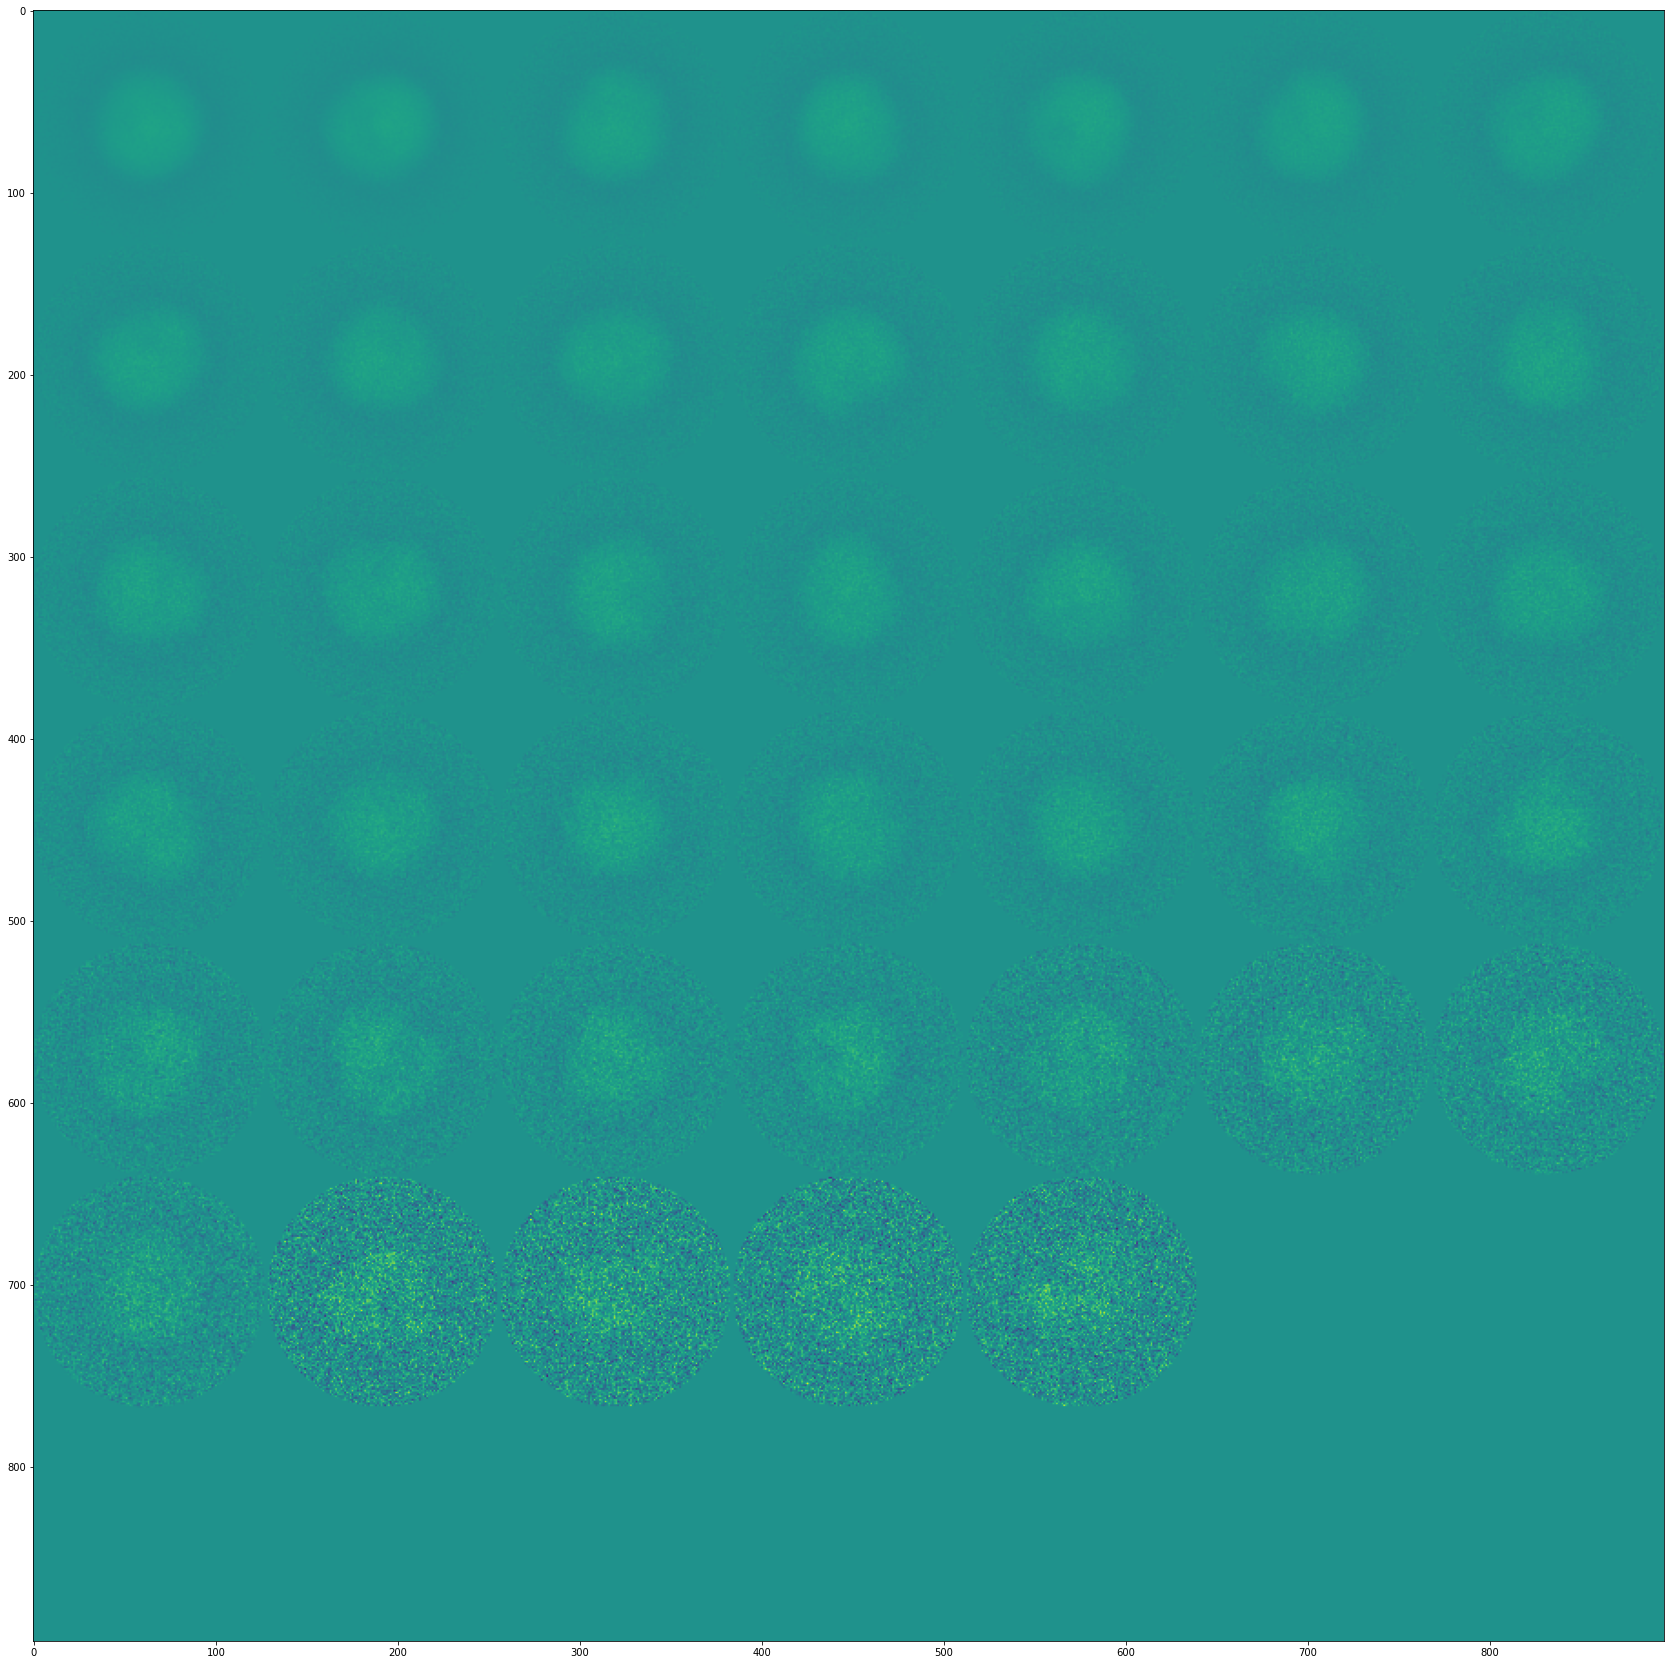

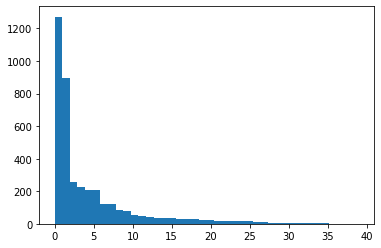

100%|██████████| 40/40 [42:13<00:00, 64.75s/it]


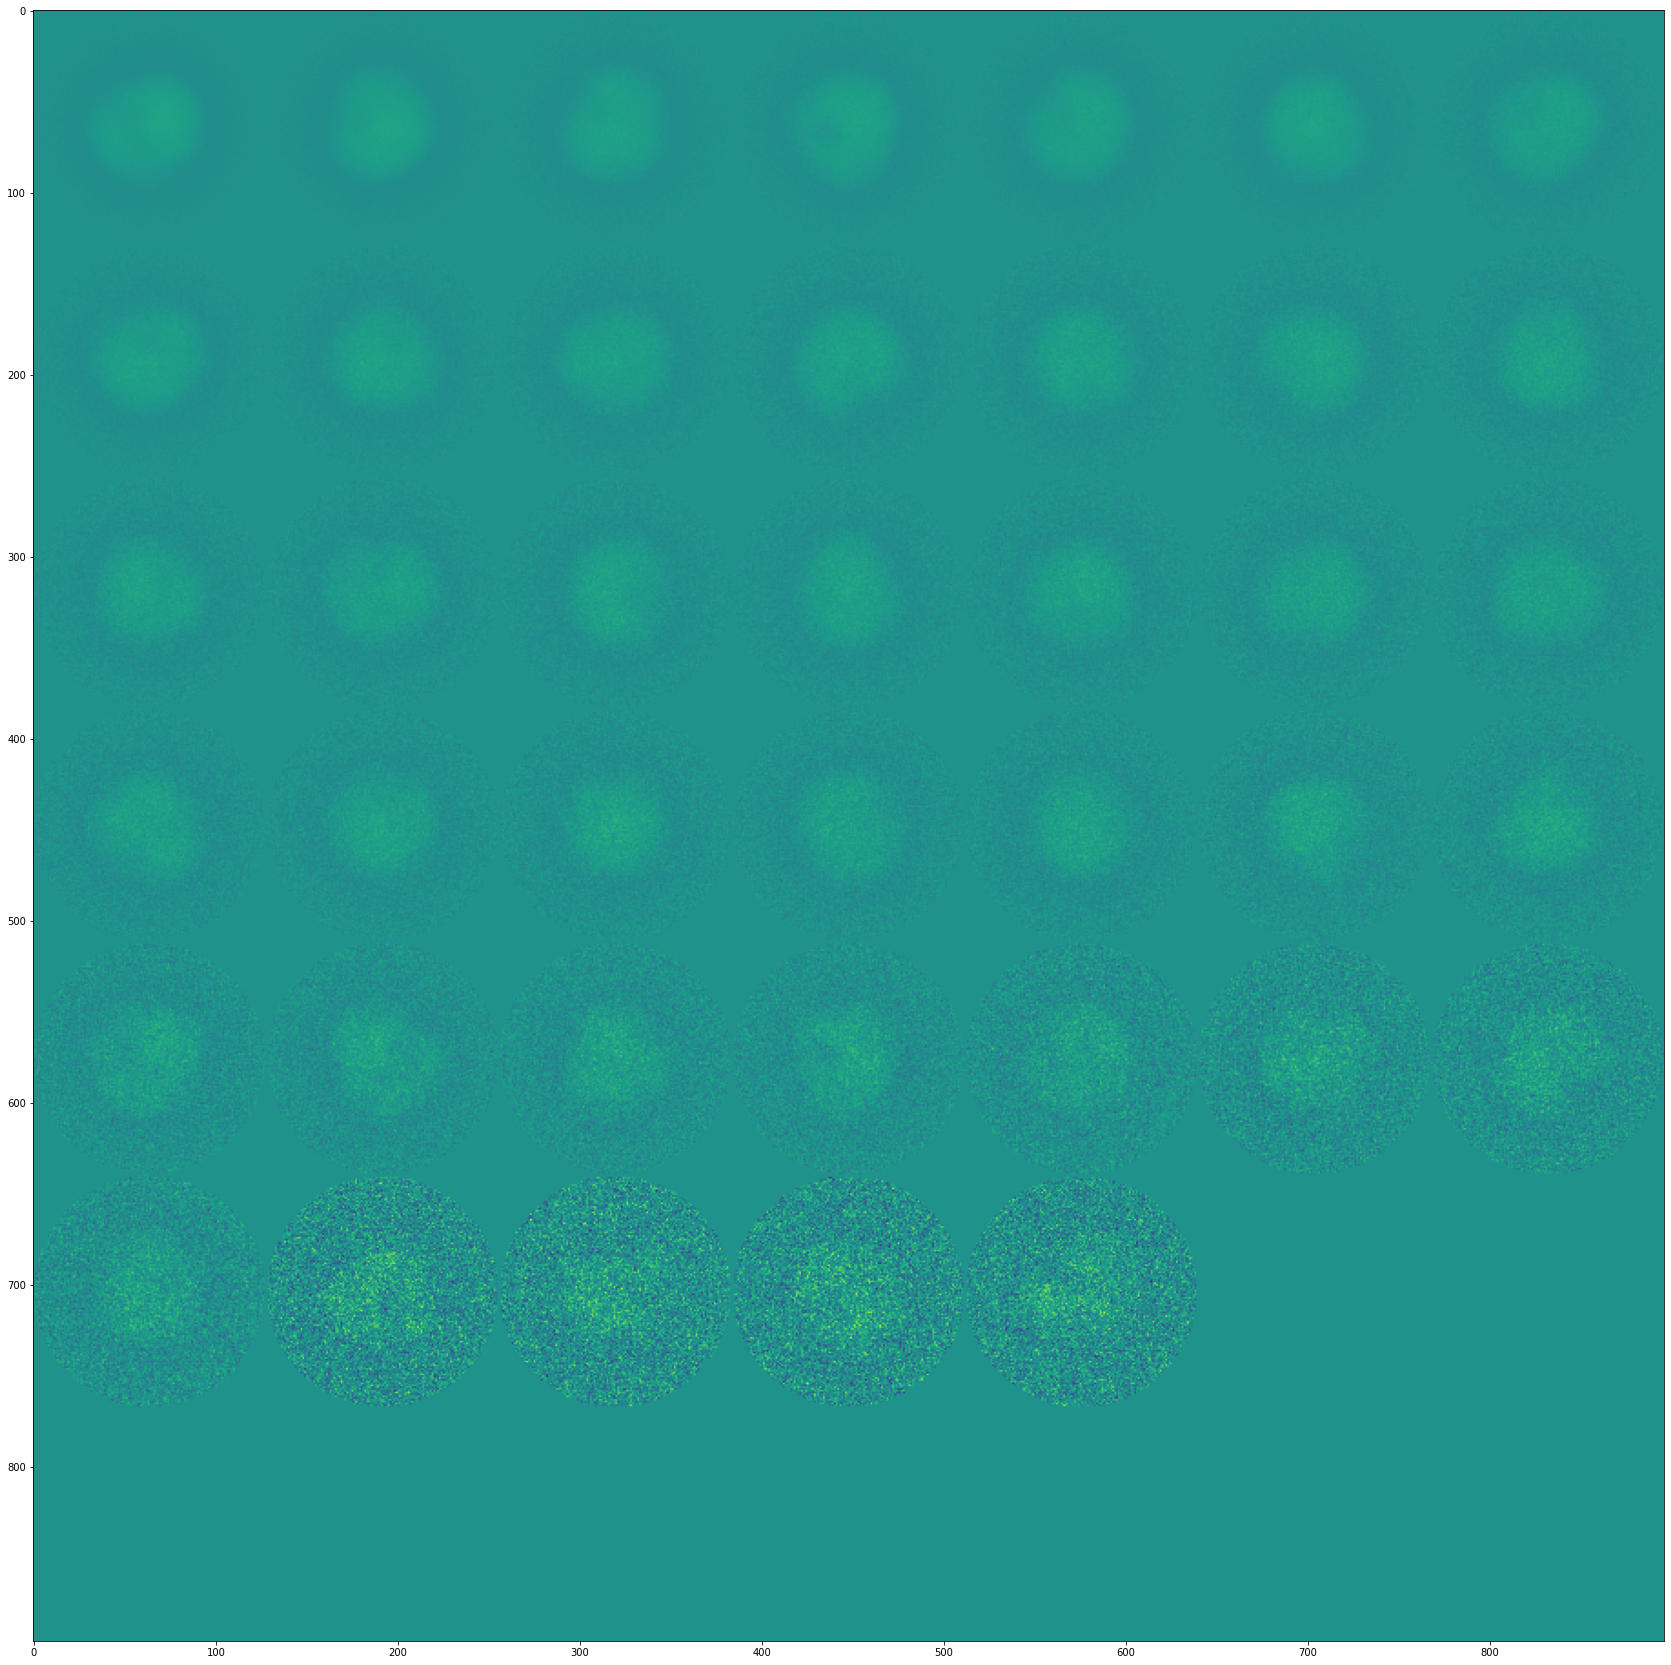

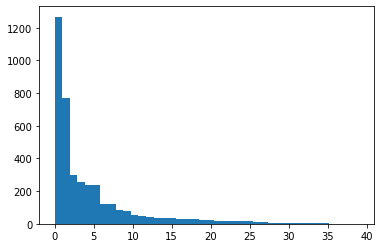

100%|██████████| 40/40 [42:15<00:00, 58.46s/it]


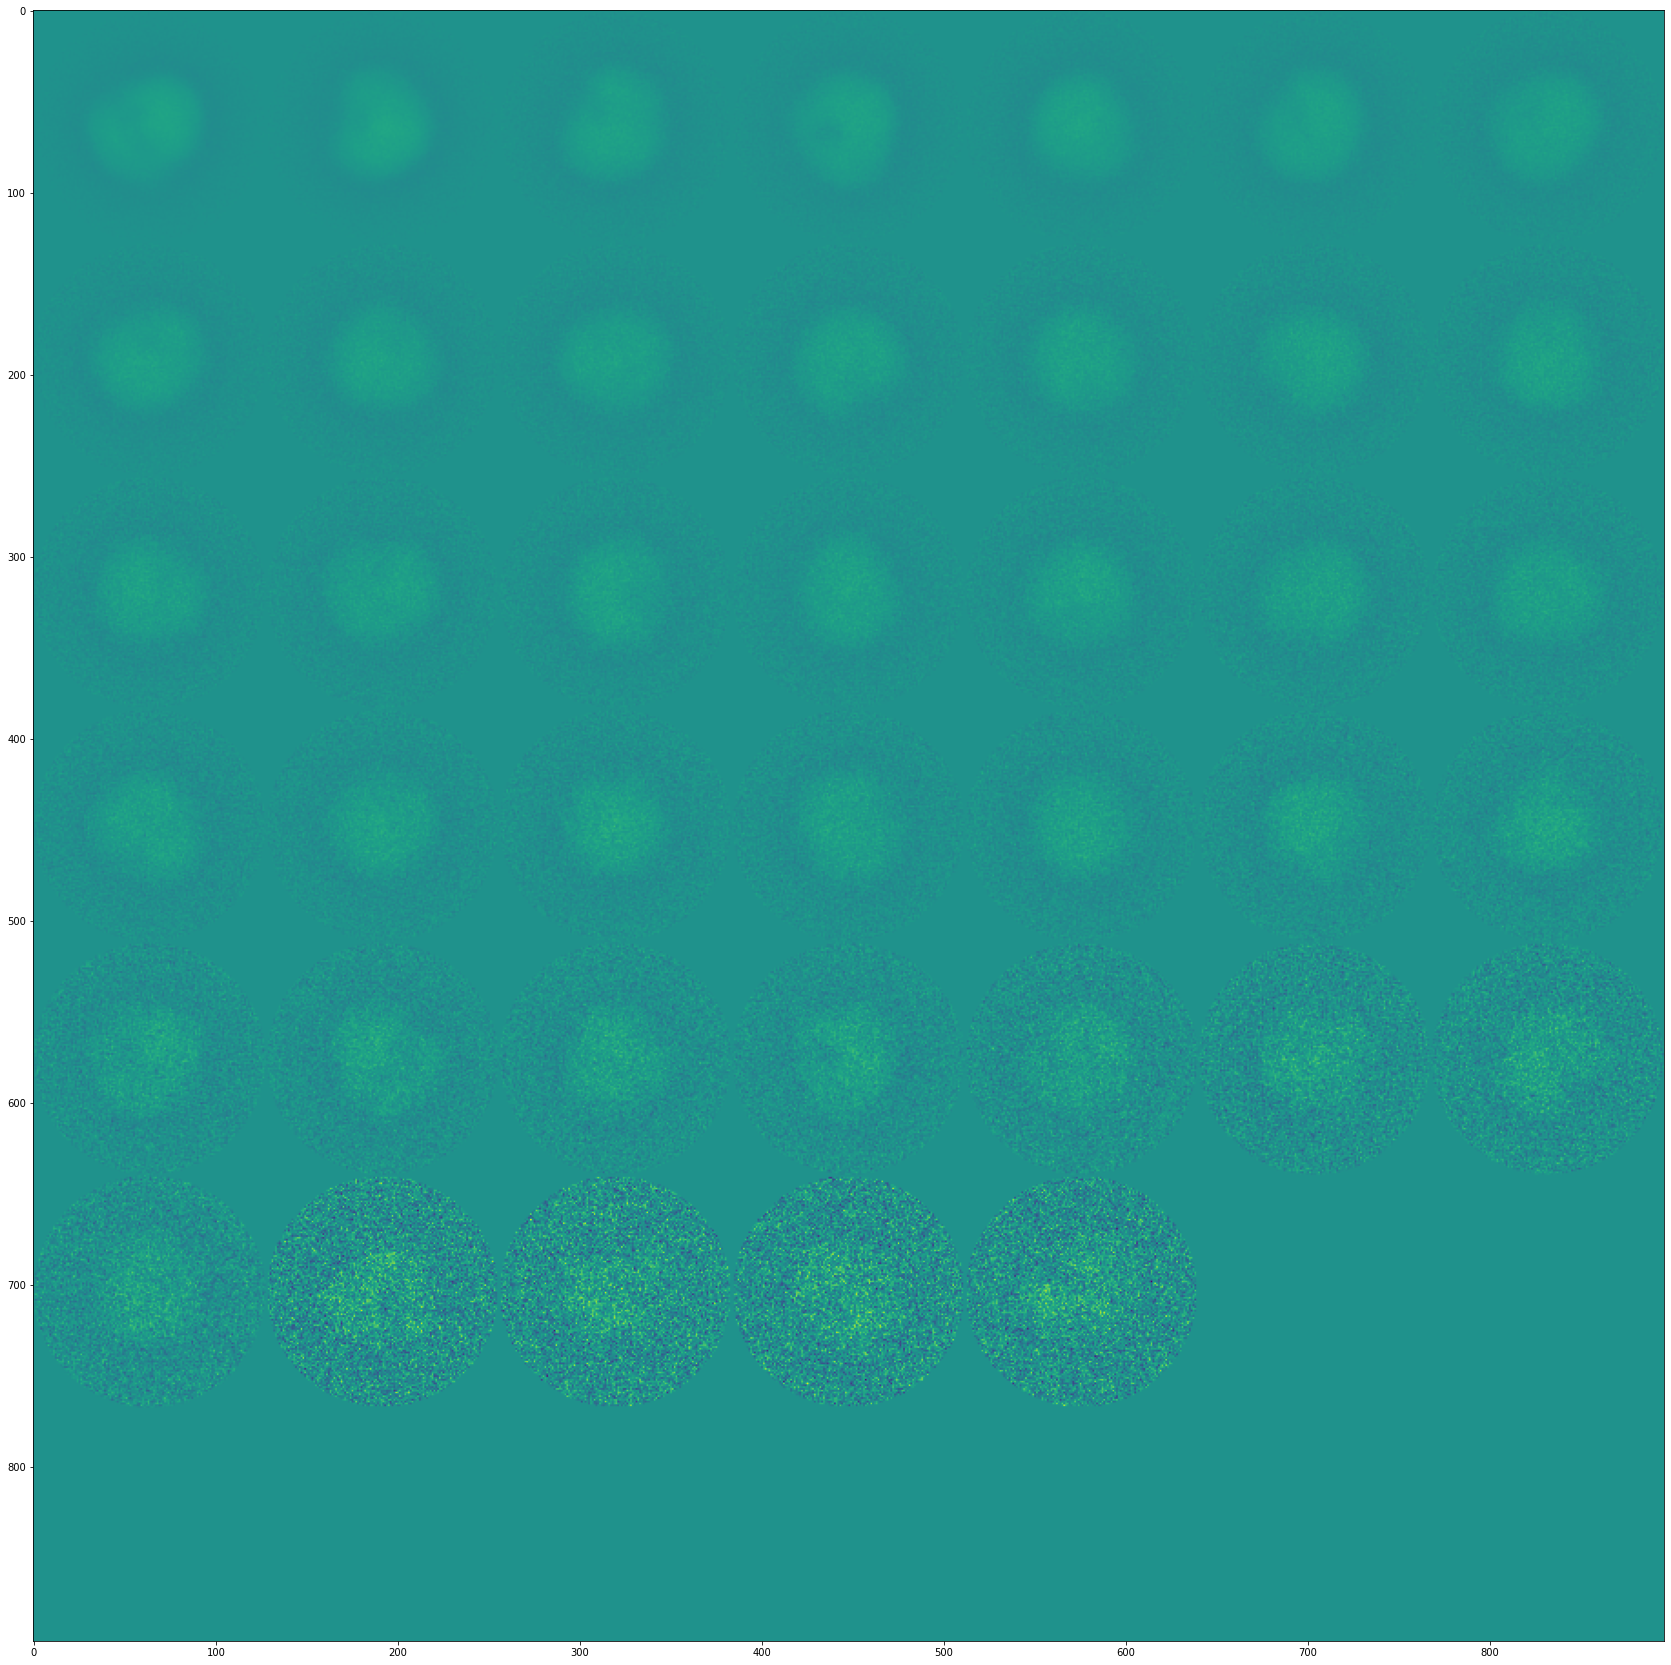

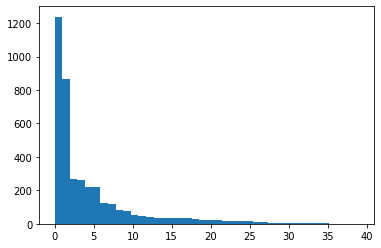

 68%|██████▊   | 27/40 [50:45<25:51, 119.32s/it]

KeyboardInterrupt: 

In [2]:
dataset = Dataset_Operations(data, metric='l2')
clustering = k_means(40, 100)
clustering.train(dataset, niter=6, init='k++')

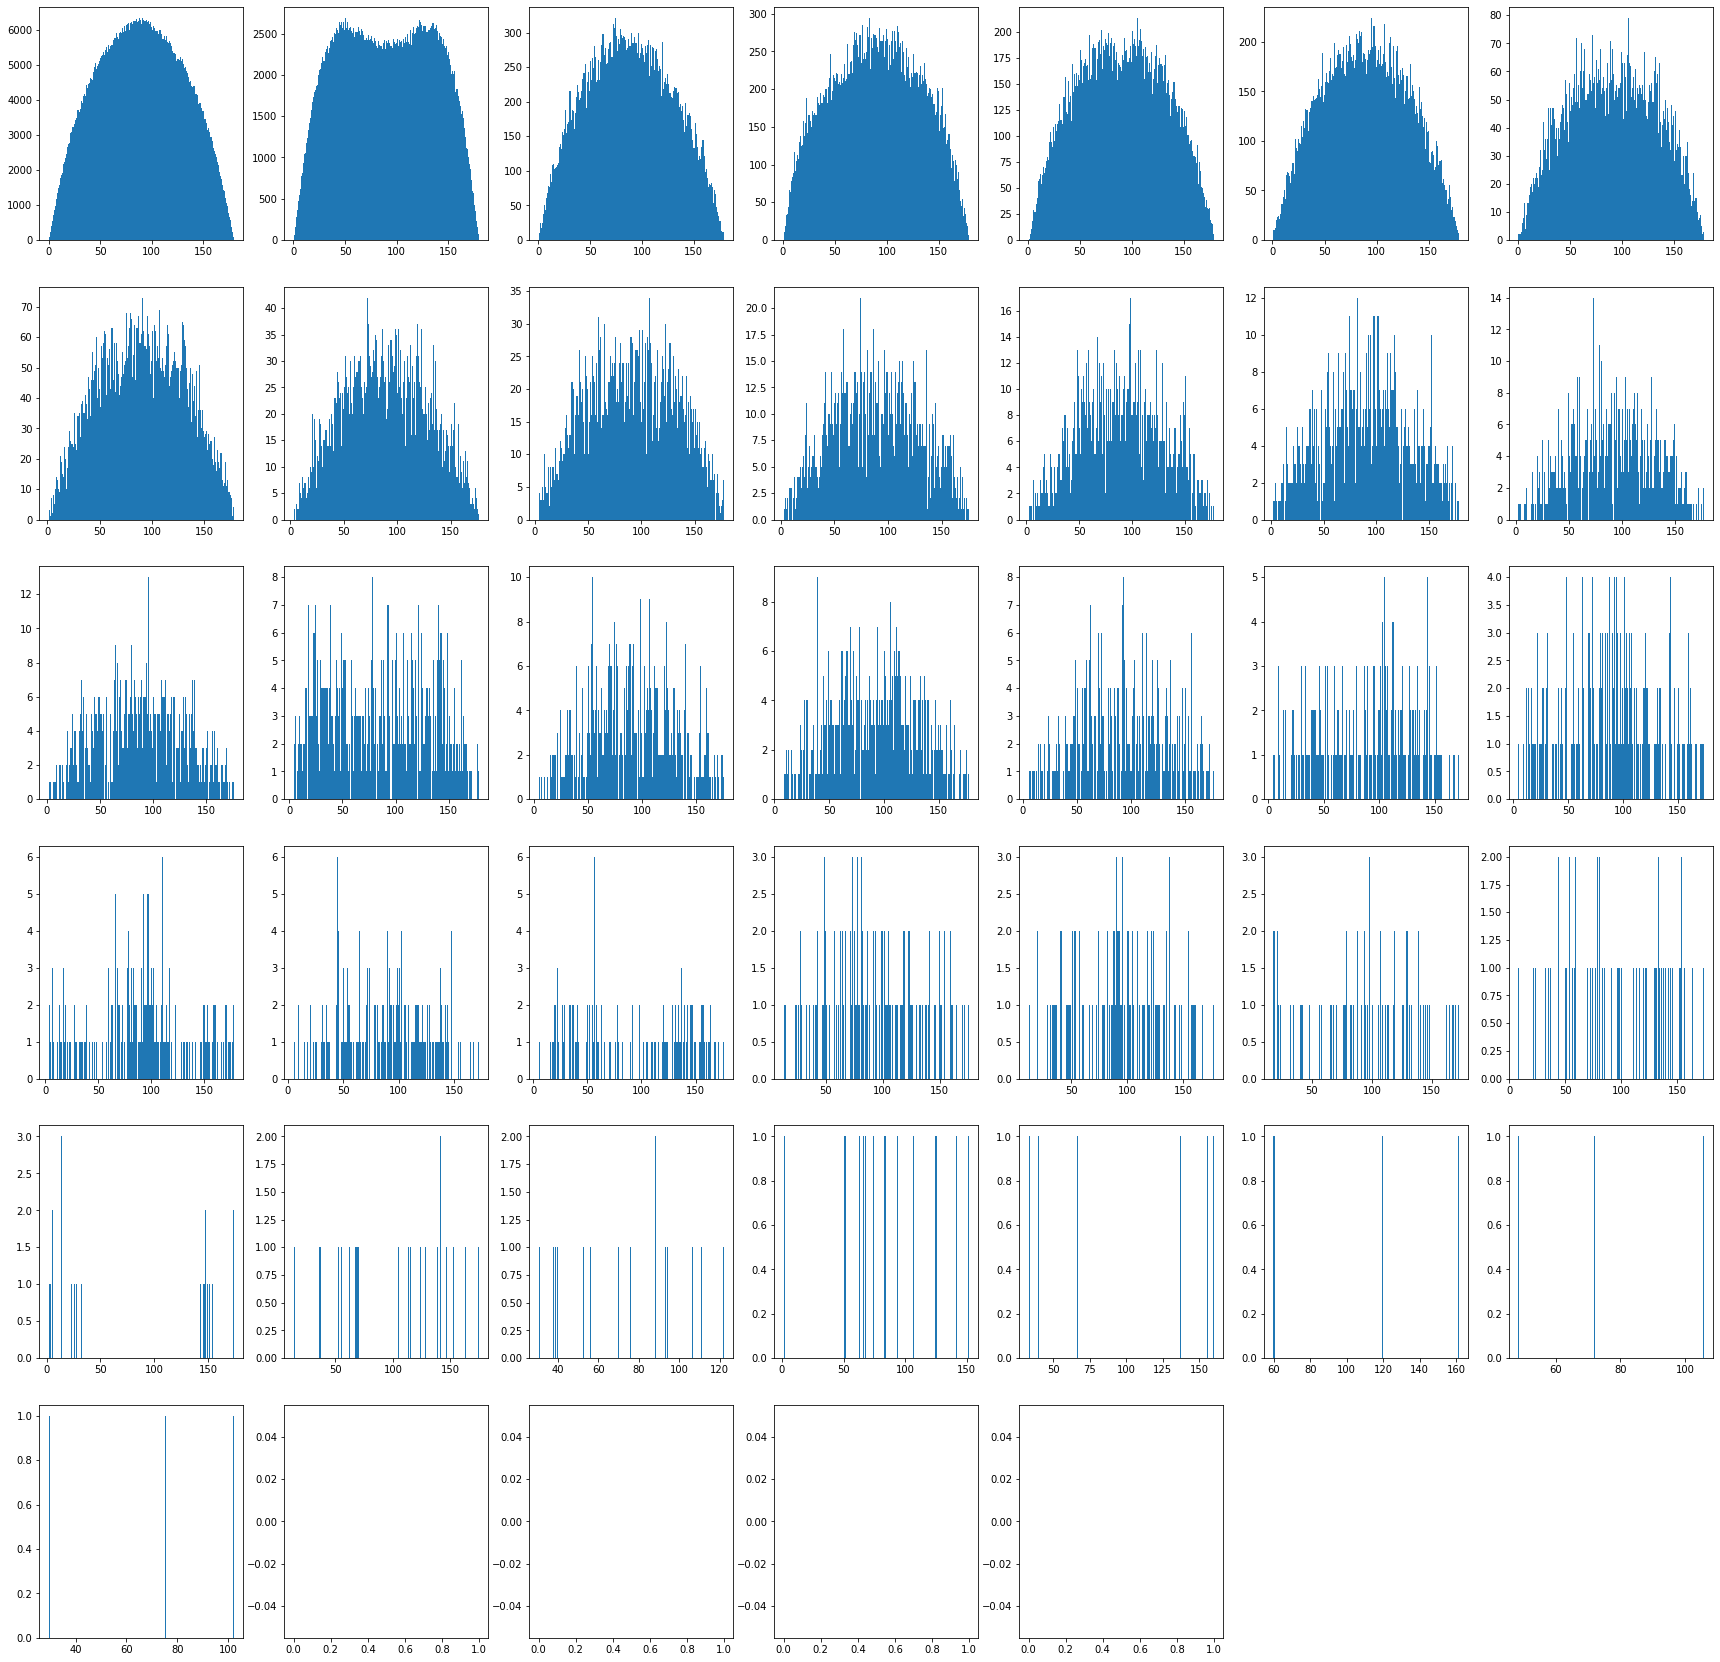

In [3]:
rotations = np.load("angles.npy")

def angle(R1, R2, mod=False):
    dot = R1.T[:,2].T @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta1 = np.arccos(dot)* (180/np.pi)
    dot = (-1*R1.T[:,2].T) @ R2.T[:,2]
    if np.abs(dot) > 1:
        dot = dot/ np.abs(dot)
    theta2 = np.arccos(dot)* (180/np.pi)
    if mod:
        return min(theta1, theta2)
    return theta1

def cluster_histogram(i, rotations, labels, mod=False):
    rots = rotations[labels == i]
    angles = []
    for i in range(len(rots)):
        for j in range(i+1, len(rots)):
            angles.append(angle(rots[i], rots[j], mod))
    return angles

def plot_histograms(hists):
    fig = plt.figure(figsize=(30,30))
    n = len(hists)
    cols = 7
    rows = np.ceil(n/7)
    for i, hist in enumerate(hists):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.hist(hist, bins=180)
    plt.show()
    
    
def ordered_plot(labels, histograms):
    counts = dict()
    for label in labels:
        counts[label] = counts[label] + 1 if label in counts else 1
    counts = [(label, counts[label]) for label in counts]
    hist_counts = [(histograms[int(label[0])], label[1]) for label in counts]
    sorted_hists = sorted(hist_counts, key=lambda x:x[1], reverse=True)
    sorted_hists = [h[0] for h in sorted_hists]
    plot_histograms(sorted_hists)
        

l2_metrics = [cluster_histogram(i, rotations, clustering.labels) for i in range(40)]


ordered_plot(clustering.labels, l2_metrics)